# Tutorial 4: Configure and connect to the database

### **Requirements:** 
* VM installed (tutorial 1 completed)
* (optional) MinIO configured
* Epiphyte installed (tutorial 3 finished, or Local Machine Installation completed)


#### Contents:

This notebook covers how to configure database settings and how to connect to the MYSQL database hosted on your computer. 

-----------

## 1. Configure access info

Below is a code snippet containing the bits that need to be configured in order to instantiate and connect to your database. 

Before running this code, you will need to change some parameters depending on the set-up you're using:

#### Option `A`:

If you are hosting the database via a VM, change the IP at comment `A` to that of your remote machine's. You can find your remote machine's IP by running the following command on that machine's terminal:
<pre style="background-color: #1E1E1E; color: white; padding: 10px; border-radius: 5px; border-left: 5px solid #007bff;">
hostname -I
</pre>

In case you receive multiple outputs, take the first entry. 

#### Option `B`:

If you plan to use this set-up for actual data at some point with multiple users, you will need to change this line to accomodate the user in question. 

#### Option `C`:

Likewise, if you plan to use this set-up for actual data, you will need to change the root password and alter it here. Note: since this require storing a password in plain text, the safest option is to not include this in the configuration settings for a deployed database. In this case, only include the user name, and each time `dj.conn()` is run, you will be prompted for your password. Annoying but safe :)  

In [ ]:
import os
import datajoint as dj

dj.config["enable_python_native_blobs"] = True
dj.config['database.host'] = '127.0.0.1:3306'            # Option A
dj.config['database.user'] = "root"                      # Option B
dj.config['database.password'] = 'simple'                # Option C

if not "stores" in dj.config:
    dj.config["stores"] = {}

epi_schema = dj.schema('epiphyte_mock')

dj.conn()

## 2. Configuring storage

If you're working locally, run the following cell to configure storage:

In [ ]:
dj.config['stores'] = {
    'local': {  # store in files
        'protocol': 'file',
        'location': os.path.abspath('./dj-store')
    }}

If you're working with a remote server using MinIO, run the cell below to configure storage.

Replace the IP address here indicated as `Option D` with the same as above from `Option A` (i.e., the IP for your remote server running the VM):

In [ ]:
dj.config["stores"]["minio"] = {  
        "protocol": "s3",
        "endpoint": "127.0.0.1:9000",  # update to your IP!
        "bucket": "dhv",
        "location": "data",
        "access_key": "root", 
        "secret_key": "simple" 
    }

Successful connection will output something like:
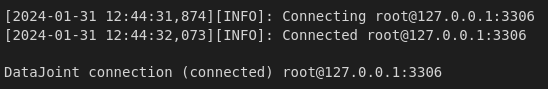

This code is already saved in the file, `/scr/epiphyte/database/access_info.py`, and can be modified to change the connection parameters. 

Once configured, you can connect by importing the `access_info.py` directly, instead of running the snippet above: 

```
# set relative import
from .database import access_info 
```

## 3. Check the database connection

This following snippet creates and `ERD` diagram, an entity relationship diagram. 

Before any tables are created, this diagram will be empty, since there are no relationships to visualize. 

In [ ]:
erd = dj.ERD(epi_schema)
erd

Once tables are created and relationships and inheritances are drawn between tables, these entities and their connections will be visualized through this function, `dj.ERD(<schema_name>)`.

## 4. Generate the mock data for the example database. 

In [ ]:
import epiphyte.data.mock_data_utils as mock_data

In [ ]:
mock_data.run_data_generation()